In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
anime_data = pd.read_csv('Anime_data.csv')

In [3]:
anime_data.head(2)

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...


In [4]:
#droping the columns that won't be used
anime_data = anime_data.drop(columns=['Genre','Synopsis','Type','Producer','Studio','Episodes','Source','Link'])
anime_data.head(2)

,Anime_id,Title,Rating,ScoredBy,Popularity,Members,Aired
0,1,Cowboy Bebop,8.81,363889.0,39.0,704490.0,"Apr 3, 1998 to Apr 24, 1999"
1,5,Cowboy Bebop: Tengoku no Tobira,8.41,111187.0,475.0,179899.0,"Sep 1, 2001"


In [5]:
#renaming the columns
anime_data = anime_data.rename(columns={'Anime_id': 'anime_id', 'Title': 'title','Rating':'rating','ScoredBy':'scored_by',
                                        'Popularity':'popularity','Members':'members','Aired':'aired'})

In [6]:
#shape of the data
anime_data.shape

(17002, 7)

In [7]:
#checking the data type f each column
anime_data.dtypes

anime_id        int64
title          object
rating        float64
scored_by     float64
popularity    float64
members       float64
aired          object
dtype: object

In [8]:
#checking for null values
anime_data.isnull().sum()

anime_id         0
title            0
rating        2577
scored_by     3775
popularity     634
members          0
aired          634
dtype: int64

In [9]:
#dropping the null values
anime_data.dropna(how = 'any', inplace = True)

In [10]:
#checking the shape after dropping the null values
anime_data.shape

(13022, 7)

In [11]:
#checking out the aired column
anime_data['aired'].head(12)

0      Apr 3, 1998 to Apr 24, 1999
1                      Sep 1, 2001
2      Apr 1, 1998 to Sep 30, 1998
3      Jul 2, 2002 to Dec 24, 2002
4     Sep 30, 2004 to Sep 29, 2005
5      Apr 6, 2005 to Mar 19, 2008
6     Apr 15, 2005 to Sep 27, 2005
7     Sep 11, 2002 to Sep 10, 2003
8     Apr 17, 2004 to Feb 18, 2006
9      Apr 7, 2004 to Sep 28, 2005
10      Oct 3, 2002 to Feb 8, 2007
11               Oct 20, 1999 to ?
Name: aired, dtype: object

In [12]:
#checking the number of animes aired on the same day
b = anime_data.groupby('aired')['title'].count()
b.tail(10)

aired
Sep 9, 2016               2
Sep 9, 2017               1
Sep, 1949                 1
Sep, 1988                 1
Sep, 1997                 1
Sep, 2002 to Jul, 2004    1
Sep, 2007                 1
Sep, 2008                 1
Sep, 2009                 1
Sep, 2012                 1
Name: title, dtype: int64

In [13]:
#function to remove speacial characters
import re
def clean_up_special(s):
  new_s = re.sub(r"[^\sa-zA-Z0-9\.\,\;]","",str(s))
  return new_s

In [14]:
#cleaning the aired column
anime_data['aired'] = anime_data['aired'].apply(clean_up_special)

In [15]:
#a function to remove the month
import re
def clean_up_month(s):
  new_s = re.sub(r"Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|to|Not|available","",str(s))
  return new_s

In [16]:
#removing month from the aired column
anime_data['aired'] = anime_data['aired'].apply(clean_up_month)

In [17]:
#checking the column to see if the characters were removed
anime_data['aired'].head()

0      3, 1998   24, 1999
1                 1, 2001
2      1, 1998   30, 1998
3      2, 2002   24, 2002
4     30, 2004   29, 2005
Name: aired, dtype: object

In [18]:
#function to remove commas joined with a number
import re
def clean_up_comma(s):
  new_s = re.sub('[\,]',"",str(s))
  return new_s

In [19]:
#applying the clean comma function to the aired column
anime_data['aired'] = anime_data['aired'].apply(clean_up_comma)

In [20]:
# creating a function to split the values in the aired column by ' '
def split_column(x):
  return x.split(' ')

In [21]:
#splting the elements in the aired column by space
anime_data['aired'] = anime_data['aired'].apply(split_column)

In [22]:
anime_data['aired'][0]

['', '3', '1998', '', '', '24', '1999']

In [23]:
#writing a function to remove all empty spaces in the list
def remove_empty(x):
    for i in x:
        if i == '':
            index = x.index(i)
            del x[index]
    return x        

In [24]:
anime_data['aired'] = anime_data['aired'].apply(remove_empty)

In [25]:
anime_data['aired'][0]

['3', '1998', '', '24', '1999']

In [26]:
#to further ensure removal of all empty elements
anime_data['aired'] = anime_data['aired'].apply(remove_empty)

In [27]:
anime_data['aired'][0]

['3', '1998', '24', '1999']

In [28]:
#writing a function that will remove elements in the column that is not a year
def not_year(x):
    for i in x:
        if int(i) <= 1900:
            index = x.index(i)
            del x[index]
    return x

In [29]:
anime_data['aired'] = anime_data['aired'].apply(not_year)

In [30]:
anime_data['aired'][:5]

0    [1998, 1999]
1          [2001]
2    [1998, 1998]
3    [2002, 2002]
4    [2004, 2005]
Name: aired, dtype: object

In [31]:
# function that only picks the first year in each row
def pick_one(x):
        if len(x) > 1:
            x = x[0]
        elif len(x) == 1:
            x = x[0]
        return x

In [32]:
anime_data['aired'] = anime_data['aired'].apply(pick_one)

In [33]:
anime_data['aired'].head()

0    1998
1    2001
2    1998
3    2002
4    2004
Name: aired, dtype: object

In [36]:
#getting the unique years in the aired column
def unique_year(x):
    unique = []
    for i in x:
        if i not in unique:
            unique.append(i)
    return unique

In [37]:
b = unique_year(anime_data['aired'])
b

['1998',
 '2001',
 '2002',
 '2004',
 '2005',
 '1999',
 '2003',
 '1995',
 '1997',
 '1996',
 '1988',
 '1993',
 '2000',
 '1979',
 '1989',
 '1991',
 '1985',
 '1986',
 '1994',
 '1992',
 '1990',
 '1978',
 '1973',
 '2006',
 '1987',
 '1984',
 '1982',
 '1983',
 '1980',
 '1976',
 '1968',
 '1977',
 '1981',
 '2007',
 '1971',
 '1967',
 '1975',
 '1962',
 '1965',
 '1969',
 '1974',
 '1964',
 '2008',
 '1972',
 '1970',
 '1966',
 '1963',
 '1945',
 '2009',
 '1933',
 '1929',
 '1943',
 '2010',
 '1931',
 '1934',
 '1960',
 '1958',
 '2011',
 '1959',
 '1930',
 '1928',
 '1932',
 '1947',
 '2012',
 '1936',
 '1917',
 '1935',
 '1938',
 '1939',
 '1941',
 '1942',
 '1948',
 '1950',
 '1957',
 '1961',
 '1918',
 '1924',
 '1925',
 '1926',
 '1927',
 '1937',
 '1940',
 '1944',
 '1946',
 '1949',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '2016',
 '2013',
 '2014',
 '2015',
 '2017',
 [],
 '2018',
 '2019']

As you can see from the unique values there are empty list, so they have to be removed. That is why unique() attribute could not be used to get the unique values

In [38]:
#a function that removes empty list
def remove_empty_list(x):
    if x != []:
        return x

In [39]:
anime_data['aired'] =  anime_data['aired'].apply(remove_empty_list)

In [40]:
#checking for null values since the empty lists were removed
anime_data.isnull().sum()

anime_id        0
title           0
rating          0
scored_by       0
popularity      0
members         0
aired         105
dtype: int64

In [41]:
#dropping the null values
anime_data.dropna(axis = 0, how = 'any',inplace = True)

In [43]:
print(anime_data['aired'].nunique())
anime_data['aired'].unique()

98


array(['1998', '2001', '2002', '2004', '2005', '1999', '2003', '1995',
       '1997', '1996', '1988', '1993', '2000', '1979', '1989', '1991',
       '1985', '1986', '1994', '1992', '1990', '1978', '1973', '2006',
       '1987', '1984', '1982', '1983', '1980', '1976', '1968', '1977',
       '1981', '2007', '1971', '1967', '1975', '1962', '1965', '1969',
       '1974', '1964', '2008', '1972', '1970', '1966', '1963', '1945',
       '2009', '1933', '1929', '1943', '2010', '1931', '1934', '1960',
       '1958', '2011', '1959', '1930', '1928', '1932', '1947', '2012',
       '1936', '1917', '1935', '1938', '1939', '1941', '1942', '1948',
       '1950', '1957', '1961', '1918', '1924', '1925', '1926', '1927',
       '1937', '1940', '1944', '1946', '1949', '1951', '1952', '1953',
       '1954', '1955', '1956', '2016', '2013', '2014', '2015', '2017',
       '2018', '2019'], dtype=object)

In [44]:
#converting the type of aired column to int
anime_data['aired'] = anime_data['aired'].astype('int')

In [45]:
anime_data.dtypes

anime_id        int64
title          object
rating        float64
scored_by     float64
popularity    float64
members       float64
aired           int32
dtype: object

In [46]:
#viewing the data
anime_data.head(3)

,anime_id,title,rating,scored_by,popularity,members,aired
0,1,Cowboy Bebop,8.81,363889.0,39.0,704490.0,1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.41,111187.0,475.0,179899.0,2001
2,6,Trigun,8.31,197451.0,158.0,372709.0,1998


In [47]:
#checking the new shape of the data
anime_data.shape

(12917, 7)

In [48]:
#a dataframe for the count of unique years
year_count = pd.DataFrame(anime_data.groupby('aired')['aired'].count())
year_count.rename(columns = {'aired':'count'}, inplace =True)
year_count = year_count.reset_index()
year_count.tail()

,aired,count
93,2015,717
94,2016,824
95,2017,795
96,2018,333
97,2019,34


In [49]:
year_count.head()

,aired,count
0,1917,15
1,1918,7
2,1924,3
3,1925,6
4,1926,6


#  Calculating the weighted average of each anime in our data

Using the Weighted Average Formula AND the members column based on popularity
WR = (RV + Cm/V+m) where:
- V is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [50]:
#finding the weighted average for each anime
V = anime_data['scored_by']                       #number of votes for each anime
R = anime_data['rating']                     #average voting rating for each anime
C = anime_data['rating'].mean()              #mean vote across the whole report
m = anime_data['scored_by'].quantile(0.80)        #minimum votes requires to be among the top 

anime_data['weighted_avg'] = ((R*V)+(C*m))/(V+m)     #used by imdb to calculate weighted average of movies

In [51]:
anime_data.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,1,Cowboy Bebop,8.81,363889.0,39.0,704490.0,1998,8.760783
1,5,Cowboy Bebop: Tengoku no Tobira,8.41,111187.0,475.0,179899.0,2001,8.280022


In [52]:
#showing the top 10 anime with the highest weighted average
total_anime = anime_data.copy()
wavg = total_anime.sort_values('weighted_avg', ascending = False)
wavg.head()

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
3634,5114,Fullmetal Alchemist: Brotherhood,9.25,730784.0,4.0,1194518.0,2009,9.220964
10110,32281,Kimi no Na wa.,9.19,467437.0,15.0,724490.0,2016,9.145762
5031,9253,Steins;Gate,9.14,561405.0,7.0,1005781.0,2011,9.103706
5725,11061,Hunter x Hunter (2011),9.11,400879.0,20.0,716409.0,2011,9.059957
8695,28851,Koe no Katachi,9.04,293169.0,53.0,507502.0,2016,8.973688


# Recommending Anime according to the best in their year group using the combination of weighted average ratings, members and popularity

In [53]:
#normalizing the weighted average and popularity column

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

### Defining all the functions that will help with this recommendation

In [54]:
#function to create group dataframes 
def create_group(first,last):
    group = pd.DataFrame(anime_data.loc[(anime_data['aired'] >= first) & (anime_data['aired'] <= last)])
    #changing the index to allow for easy joining of the dataframes later
    group.index = [x for x in range(group.shape[0])]
    return group

In [55]:
#function to normalize the weighted average, popularity and membrs
def norm(group):
    data_scaled = min_max_scaler.fit_transform(group[['weighted_avg','popularity','members']])
    data_norm = pd.DataFrame(data_scaled, columns = ['weighted_avg','popularity','members'])
    return data_norm

In [56]:
#function to create a score value that splits scaled weighted_avg, popularity and members
def create_score(group,data_norm):
    group[['norm_weighted_avg','norm_popularity','norm_members']] = data_norm
    group['score'] = group['norm_weighted_avg']*0.8 +group['norm_popularity']*0.1 + group['norm_members']*0.1
    data_scored = group.sort_values(['score'], ascending=False)
    return data_scored

In [57]:
#a function to show normalized features and the new score  feature
def show_normalized(data):
    return data[['title','norm_weighted_avg','norm_popularity','norm_members','score']].head()

In [58]:
#a function to plot the top anime according to a split between weighted avg, members and popularity
def plot(data,first,last):
    plt.figure(figsize=(18,8))

    ax = sns.barplot(x = data['score'].head(10), y = data['title'].head(10), data = data, palette='Set2')


    plt.title('Best anime between years {} and {}'.format (first,last), weight = 'bold')
    plt.xlabel('Score', weight = 'bold')
    plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('scored.png')

### Group1 recommendation (1900 to 1959)

In [59]:
group_1 = create_group(1900,1959)
group_1.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,2765,Momotarou: Umi no Shinpei,5.31,465.0,8670.0,1075.0,1945,6.21225
1,3929,Ugokie Kori no Tatehiki,5.64,399.0,9638.0,737.0,1933,6.23744


In [60]:
data_norm_1 = norm(group_1)

In [61]:
data_scored_1 = create_score(group_1,data_norm_1)

In [62]:
show_normalized(data_scored_1)

,title,norm_weighted_avg,norm_popularity,norm_members,score
177,Shin Kachikachi Yama,0.992410,0.940704,0.018611,0.889859
179,Kachikachi Yama (1939),0.986928,0.960017,0.018278,0.887372
96,Shisei Sasshin,0.991257,0.901973,0.023928,0.885596
216,Chuukichi wa Kaetta,0.978934,1.000000,0.009305,0.884078
107,Poppoya-san: Nonki Ekichou,0.996583,0.823259,0.033234,0.882916


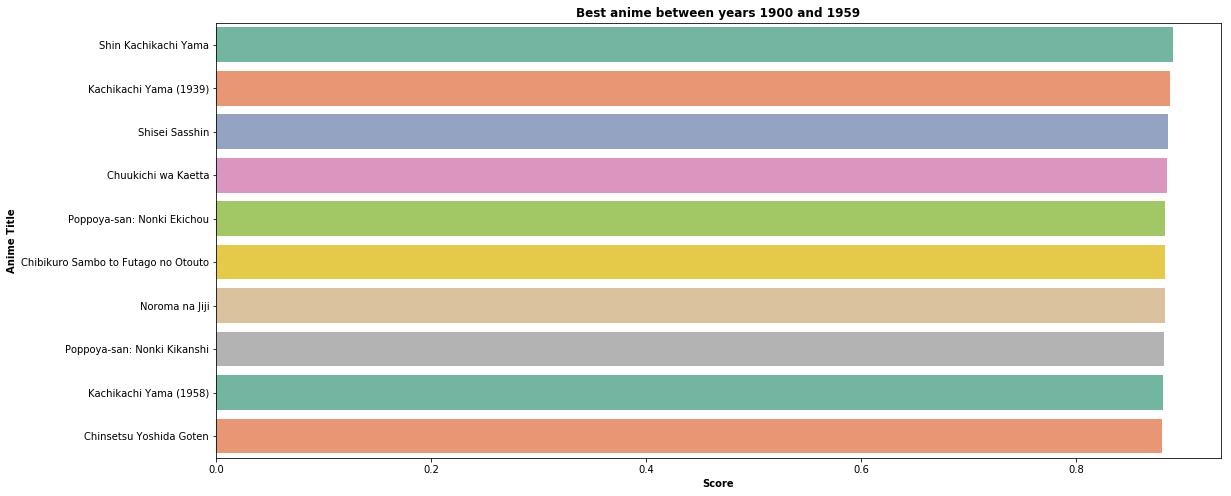

In [63]:
plot(data_scored_1,1900,1959)

### Group2 recommendation (1960 to 1979)

In [64]:
group_2 = create_group(1960,1979)
group_2.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,80,Mobile Suit Gundam,7.87,29261.0,1332.0,66802.0,1979,7.554443
1,283,Akage no Anne,7.75,4070.0,3399.0,13669.0,1979,6.805234


In [65]:
data_norm_2 = norm(group_2)

In [66]:
data_scored_2 = create_score(group_2,data_norm_2)

In [67]:
show_normalized(data_scored_2)

,title,norm_weighted_avg,norm_popularity,norm_members,score
19,Lupin III: Cagliostro no Shiro,1.000000,0.018778,0.668144,0.868692
6,Versailles no Bara,0.944158,0.028167,0.660358,0.824179
0,Mobile Suit Gundam,0.893519,0.000000,1.000000,0.814815
16,Lupin III,0.763594,0.021997,0.704094,0.683484
2,Mirai Shounen Conan,0.747106,0.087385,0.329026,0.639326


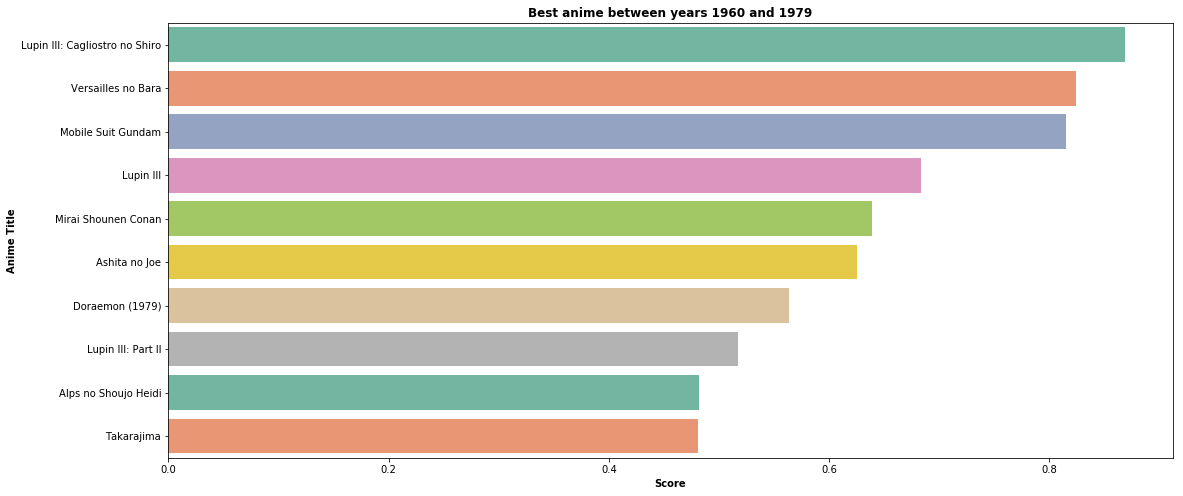

In [68]:
plot(data_scored_2,1960,1979)

### Group3 recommendation (1980 to 1989)

In [69]:
group_3 = create_group(1980,1989)
group_3.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,47,Akira,8.16,190158.0,195.0,309004.0,1988,8.091144
1,82,Mobile Suit Gundam 0080: War in the Pocket,7.87,16209.0,2298.0,29545.0,1989,7.378440


In [70]:
data_norm_3 = norm(group_3)

In [71]:
data_scored_3 = create_score(group_3,data_norm_3)

In [72]:
show_normalized(data_scored_3)

,title,norm_weighted_avg,norm_popularity,norm_members,score
22,Tonari no Totoro,0.979575,0.001055,0.911369,0.874903
25,Hotaru no Haka,1.000000,0.012284,0.552138,0.856442
24,Kaze no Tani no Nausicaä,0.960918,0.022210,0.423764,0.813332
8,Dragon Ball,0.865619,0.000000,1.000000,0.792495
20,Majo no Takkyuubin,0.900128,0.016006,0.485183,0.770222


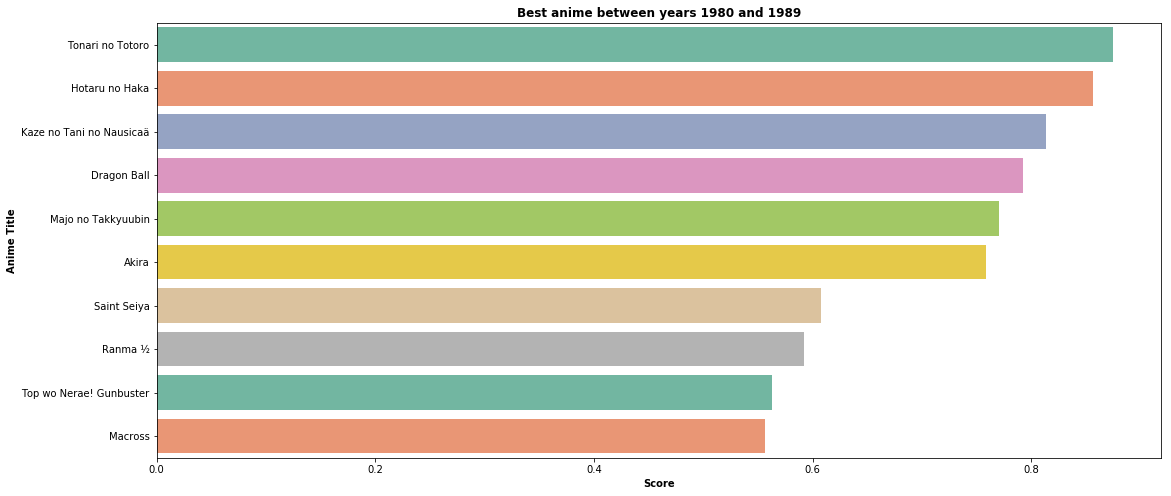

In [73]:
plot(data_scored_3,1980,1989)

### Group4 recommendation (1990 to 1999)

In [74]:
group_4 = create_group(1990,1999)
group_4.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,1,Cowboy Bebop,8.81,363889.0,39.0,704490.0,1998,8.760783
1,6,Trigun,8.31,197451.0,158.0,372709.0,1998,8.238327


In [75]:
data_norm_4 = norm(group_4)

In [76]:
data_scored_4 = create_score(group_4,data_norm_4)

In [77]:
show_normalized(data_scored_4)

,title,norm_weighted_avg,norm_popularity,norm_members,score
0,Cowboy Bebop,1.000000,0.000247,0.983047,0.898329
41,Mononoke Hime,0.995535,0.002596,0.706581,0.867345
2,One Piece,0.918994,0.000000,1.000000,0.835195
60,Great Teacher Onizuka,0.964862,0.007911,0.502218,0.822903
8,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,0.950189,0.031028,0.232937,0.786548


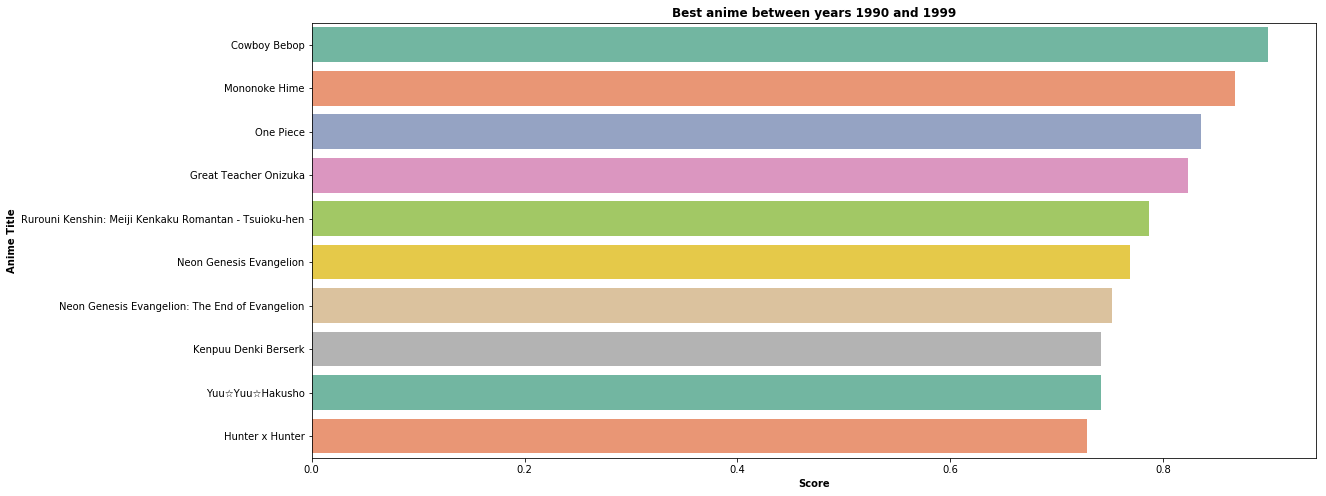

In [78]:
plot(data_scored_4,1990,1999)

### Group5 recommendation (2000 to 2009)

In [79]:
group_5 = create_group(2000,2009)
group_5.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,5,Cowboy Bebop: Tengoku no Tobira,8.41,111187.0,475.0,179899.0,2001,8.280022
1,7,Witch Hunter Robin,7.34,31875.0,1278.0,74889.0,2002,7.143127


In [80]:
data_norm_5 = norm(group_5)

In [81]:
data_scored_5 = create_score(group_5,data_norm_5)

In [82]:
show_normalized(data_scored_5)

,title,norm_weighted_avg,norm_popularity,norm_members,score
1973,Fullmetal Alchemist: Brotherhood,1.000000,0.000184,0.822835,0.882302
728,Death Note,0.905169,0.000000,1.000000,0.824135
1328,Code Geass: Hangyaku no Lelouch R2,0.948902,0.001598,0.543387,0.813620
1757,Clannad: After Story,0.955879,0.003872,0.417341,0.806824
749,Code Geass: Hangyaku no Lelouch,0.923265,0.000615,0.677595,0.806433


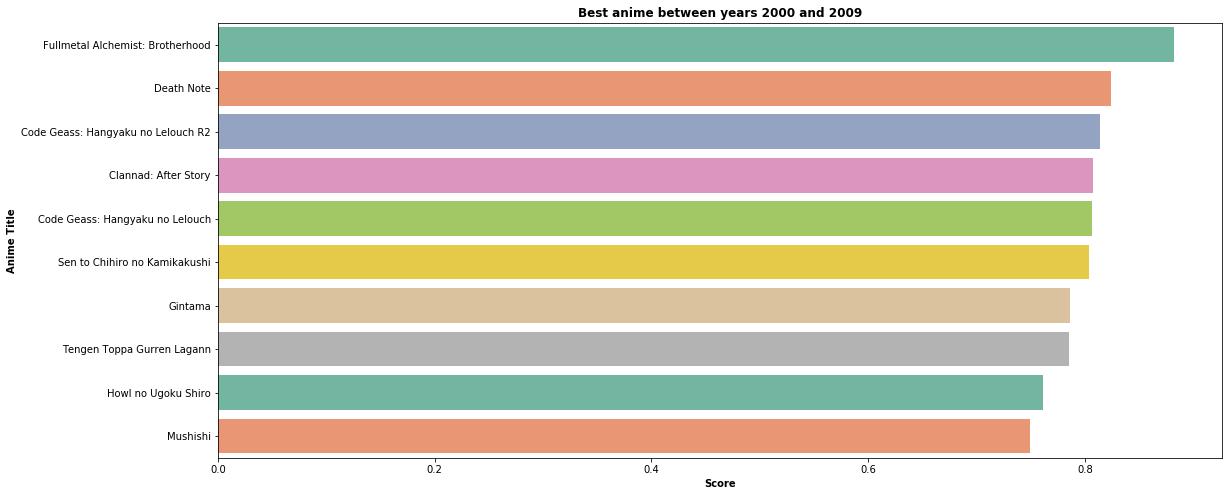

In [83]:
plot(data_scored_5,2000,2009)

### Group6 recommendation (2010 to 2019)

In [84]:
group_6 = create_group(2010,2019)
group_6.head(2)

,anime_id,title,rating,scored_by,popularity,members,aired,weighted_avg
0,4106,Trigun: Badlands Rumble,8.05,46942.0,1117.0,84011.0,2010,7.813595
1,4713,Heart no Kuni no Alice: Wonderful Wonder World,6.23,7822.0,2797.0,23507.0,2011,6.249441


In [85]:
data_norm_6 = norm(group_6)

In [86]:
data_scored_6 = create_score(group_6,data_norm_6)

In [87]:
show_normalized(data_scored_6)

,title,norm_weighted_avg,norm_popularity,norm_members,score
253,Steins;Gate,0.991809,0.000307,0.750222,0.868500
3243,Kimi no Na wa.,1.000000,0.000798,0.540403,0.854120
663,Hunter x Hunter (2011),0.983289,0.001105,0.534375,0.840179
2373,Koe no Katachi,0.966487,0.003132,0.378548,0.811358
2616,One Punch Man,0.914072,0.000184,0.757220,0.806998


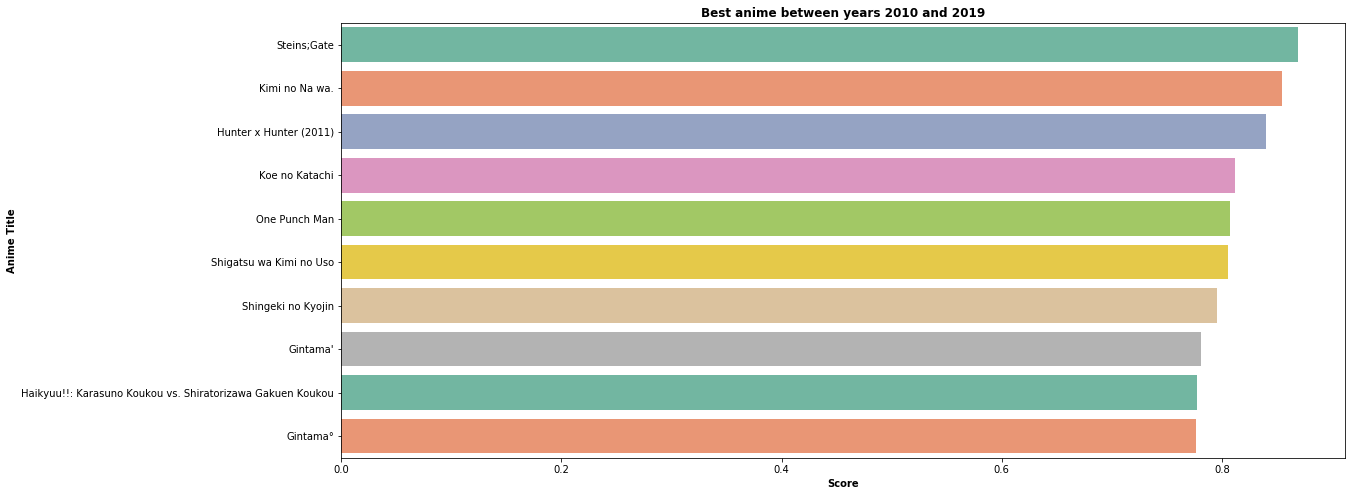

In [88]:
plot(data_scored_6,2010,2019)